In [14]:
import pandas as pd

file_path = '/Users/selina/washu/BME 440/final/cleaned_transformed_histone_dataset.tsv'
data = pd.read_csv(file_path, sep='\t')
dataset = pd.read_csv(file_path, sep='\t')

data.head()

,H2A.2,H3K4me1,H3K9me2,H2A.13,H3K4me3,H3K36me3,H4K5Ac,H2A.Z.11,H3K27me3_log,H3K9Ac_log,...,H3K9K14Ac_log,H3Ac_log,chh_percentage_log,H4K20me1_log,chg_percentage_log,H2A.W.7_log,H3K9me1_log,H2A.W.6_log,H2A.Z.9_log,Gene Expression (FPKM)_log
0,20.902491,21.780787,11.649541,21.709216,22.753021,24.658615,20.698356,30.825020,2.257137,3.047825,...,2.944249,4.200427,-0.725579,2.834831,-0.663095,2.249764,2.711092,2.157811,3.462258,1.456310
1,23.740520,15.113436,8.942999,19.870964,19.515533,23.943244,13.163694,13.115434,2.114020,3.086580,...,3.238499,2.816287,-0.977337,2.245482,-2.065499,2.023018,2.438172,1.965014,2.550882,1.790108
2,17.747587,15.150620,7.870447,19.173416,32.267306,21.883899,21.484286,33.601489,4.364481,3.378635,...,3.786104,4.604276,-1.476793,2.380941,-3.595025,2.191610,2.287853,2.034952,3.911400,1.747477
3,37.745676,23.522419,8.761089,36.108781,21.044304,34.021623,20.185070,7.559050,2.553780,2.568995,...,2.538956,3.668659,-1.131373,2.805300,-0.807703,2.293433,2.684839,2.178217,1.664626,2.196124
4,22.483920,15.337061,10.418079,22.655993,22.021956,26.216809,10.410831,15.680742,2.171248,2.973094,...,3.074884,3.160947,-1.042688,2.261644,-1.162812,1.952232,2.342968,1.860626,2.643165,4.202004


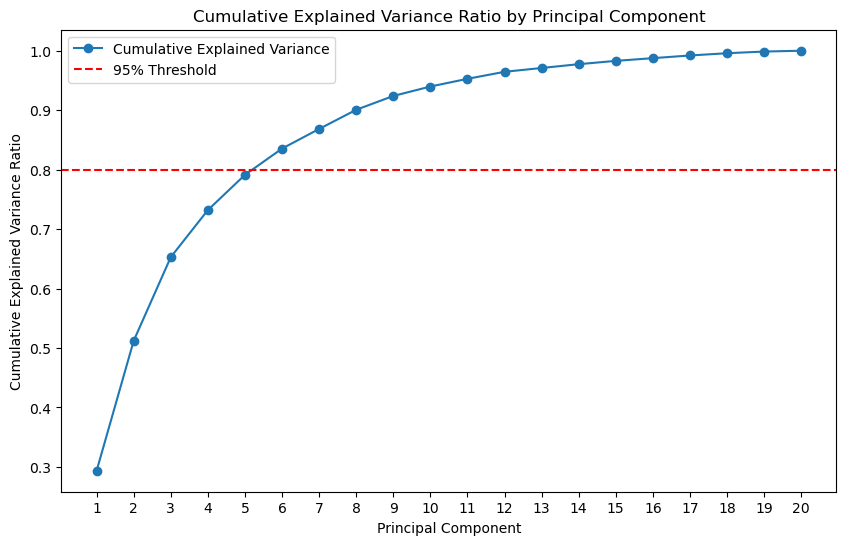

Top 11 Features Contributing to PCA Components:
['H3K9me2', 'chg_percentage_log', 'H3K27me3_log', 'chh_percentage_log', 'H2A.W.7_log', 'H3K4me3', 'cpg_percentage_log', 'H2A.W.6_log', 'H4K20me1_log', 'H4K5Ac', 'H3K36me3']


In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = "cleaned_transformed_histone_dataset.tsv"
dataset = pd.read_csv(file_path, sep='\t')

# Separate predictors and target variable
X = dataset.drop(columns=["Gene Expression (FPKM)_log"])
y = dataset["Gene Expression (FPKM)_log"]

# Standardize the predictor variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Compute cumulative explained variance
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# Plot explained variance ratio with 95% threshold line
plt.figure(figsize=(10, 6))
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), cumulative_explained_variance, marker='o', label='Cumulative Explained Variance')
plt.axhline(y=0.80, color='r', linestyle='--', label='95% Threshold')
plt.title("Cumulative Explained Variance Ratio by Principal Component")
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.legend()
plt.show()


# Create a DataFrame for the PCA loading matrix
loading_matrix = pd.DataFrame(pca.components_, columns=X.columns)

# Calculate the mean absolute contribution of each feature to the first 11 components
top_features = loading_matrix.iloc[:11].abs().mean(axis=0).sort_values(ascending=False)

# Extract the names of the top 11 features
selected_features = top_features.head(11).index.tolist()

print("Top 11 Features Contributing to PCA Components:")
print(selected_features)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

file_path = '/Users/selina/washu/BME 440/final/cleaned_transformed_histone_dataset.tsv'
dataset = pd.read_csv(file_path, sep='\t')

X = dataset.drop(columns=["Gene Expression (FPKM)_log"])
y = dataset["Gene Expression (FPKM)_log"]

# Standardize the data before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets first
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rmse_list = []
r2_list = []

# Now apply PCA once and transform the data
for i in range(1, 20):
    # Apply PCA with 'i' components
    pca = PCA(n_components=i)
    X_train_comp = pca.fit_transform(X_train)
    X_test_comp = pca.transform(X_test)

    # Train RandomForestRegressor with the transformed data
    rf = RandomForestRegressor(random_state=42, n_estimators=100)
    rf.fit(X_train_comp, y_train)
    y_pred = rf.predict(X_test_comp)

    # Calculate RMSE and R^2
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_list.append(rmse)
    
    r2 = r2_score(y_test, y_pred)
    r2_list.append(r2)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(range(1, 20), rmse_list, marker='o', label='RMSE', color='blue')
ax1.set_xlabel('Number of Components')
ax1.set_ylabel('RMSE')
ax1.tick_params(axis='y')
ax1.set_title('RMSE and R^2 vs. Number of PCA Components')
ax1.set_xticks(range(1, 20))

ax2 = ax1.twinx()
ax2.plot(range(1, 20), r2_list, marker='o', label='R^2', color='orange')
ax2.set_ylabel('R^2')
ax2.tick_params(axis='y')
                
fig.legend(loc="upper right")
plt.show()

<Figure size 1000x800 with 0 Axes>

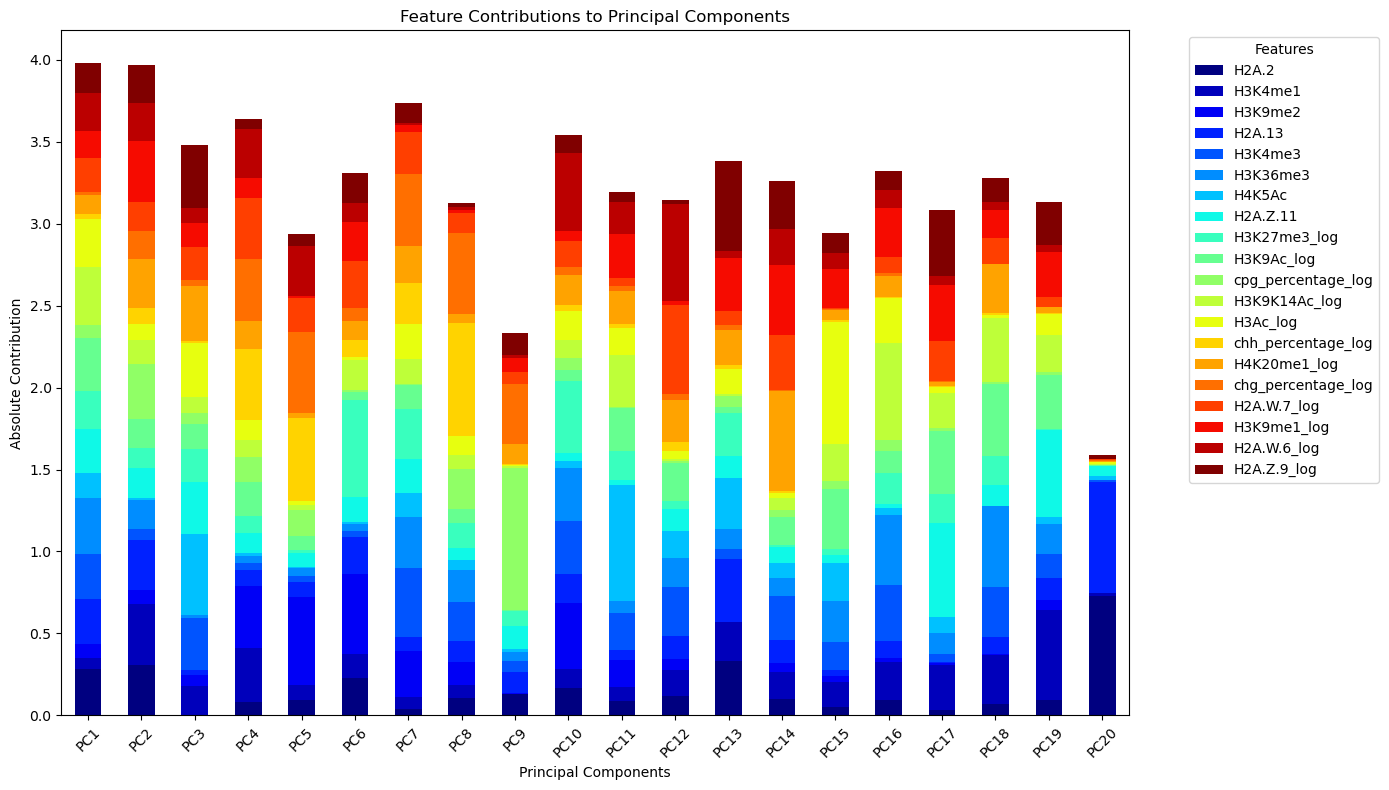

In [17]:
# Prepare data for a stacked bar chart with x-axis as principal components
contribution_matrix = pd.DataFrame(
    pca.components_.T,  # Transpose to get features as rows
    columns=[f"PC{i+1}" for i in range(len(pca.components_))],
    index=X.columns
)

# Plot stacked bar chart for the contributions of features to PCs
plt.figure(figsize=(10, 8))
contribution_matrix_abs = contribution_matrix.abs()  # Use absolute contributions for visualization
contribution_matrix_abs.iloc[:].T.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='jet')

# Set axis labels and title
plt.xlabel("Principal Components")
plt.ylabel("Absolute Contribution")
plt.title("Feature Contributions to Principal Components")
plt.xticks(rotation=45)
plt.legend(title="Features", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [18]:
import os
import pandas as pd

# Your existing code to create the DataFrame
results = pd.DataFrame({
    'Number of Features': components_range,
    'R^2 Values': r2_scores,
    'RMSE Values': rmse_scores
})

print(results.to_string(index=True))

# Get the path to the user's desktop
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")

# Save the DataFrame to a CSV file on the desktop
results.to_csv(os.path.join(desktop_path, 'pcs.csv'), index=True)

print("The file has been saved to your desktop as 'pcs.csv'.")


    Number of Features  R^2 Values  RMSE Values
0                    1    0.333914     3.224856
1                    2    0.485797     2.833430
2                    3    0.509983     2.765991
3                    4    0.534424     2.696128
4                    5    0.545254     2.664586
5                    6    0.558663     2.625007
6                    7    0.565000     2.606092
7                    8    0.570964     2.588166
8                    9    0.576581     2.571166
9                   10    0.586270     2.541580
10                  11    0.600869     2.496334
11                  12    0.605153     2.482903
12                  13    0.606917     2.477349
13                  14    0.604906     2.483679
14                  15    0.607227     2.476371
15                  16    0.616468     2.447067
16                  17    0.616876     2.445764
17                  18    0.619837     2.436295
18                  19    0.623800     2.423564
The file has been saved to your desktop 

In [8]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd


# Split dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform Lasso regression with cross-validation
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Get the best alpha value
best_alpha = lasso.alpha_

# Predict on the test set
y_pred = lasso.predict(X_test_scaled)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Get the coefficients of the features
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lasso.coef_
}).sort_values(by="Coefficient", ascending=False)

# Output the results
print("Best alpha value:", best_alpha)
print("Mean Squared Error:", mse)
print("\nLasso Regression Coefficients:")
print(coefficients)

Best alpha value: 0.00478481600043946
Mean Squared Error: 6.755037992655123

Lasso Regression Coefficients:
               Feature  Coefficient
11       H3K9K14Ac_log     2.541621
14        H4K20me1_log     0.780509
4              H3K4me3     0.559017
5             H3K36me3     0.472667
10  cpg_percentage_log     0.306055
15  chg_percentage_log     0.163758
3               H2A.13     0.033805
1              H3K4me1     0.000000
13  chh_percentage_log    -0.000000
0                H2A.2     0.000000
8         H3K27me3_log     0.000000
2              H3K9me2    -0.000000
19         H2A.Z.9_log     0.000000
18         H2A.W.6_log    -0.057488
12            H3Ac_log    -0.158439
17         H3K9me1_log    -0.235523
16         H2A.W.7_log    -0.308473
6               H4K5Ac    -0.559686
9           H3K9Ac_log    -0.627946
7             H2A.Z.11    -0.716559


In [ ]:
print(components_range = range(1,20))

In [ ]:
import matplotlib.pyplot as plt

# 1. Feature Coefficients Plot
plt.figure(figsize=(10, 6))
coefficients_nonzero = coefficients[coefficients['Coefficient'] != 0]
plt.barh(coefficients_nonzero['Feature'], coefficients_nonzero['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Lasso Regression Feature Coefficients (Non-Zero)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [50]:
# Identify the names of features selected by Lasso
selected_feature_names = X.columns[lasso.coef_ != 0].tolist()

# Display the selected features
print("Features selected by Lasso Regression:")
print(selected_feature_names)
print(len(selected_feature_names))

Features selected by Lasso Regression:
['H3K4me1', 'H3K9me2', 'H3K4me3', 'H3K36me3', 'H4K5Ac', 'H2A.Z.11', 'H3K27me3_log', 'H3K9Ac_log', 'cpg_percentage_log', 'H3K9K14Ac_log', 'H4K20me1_log', 'chg_percentage_log', 'H2A.W.7_log', 'H2A.W.6_log']
14


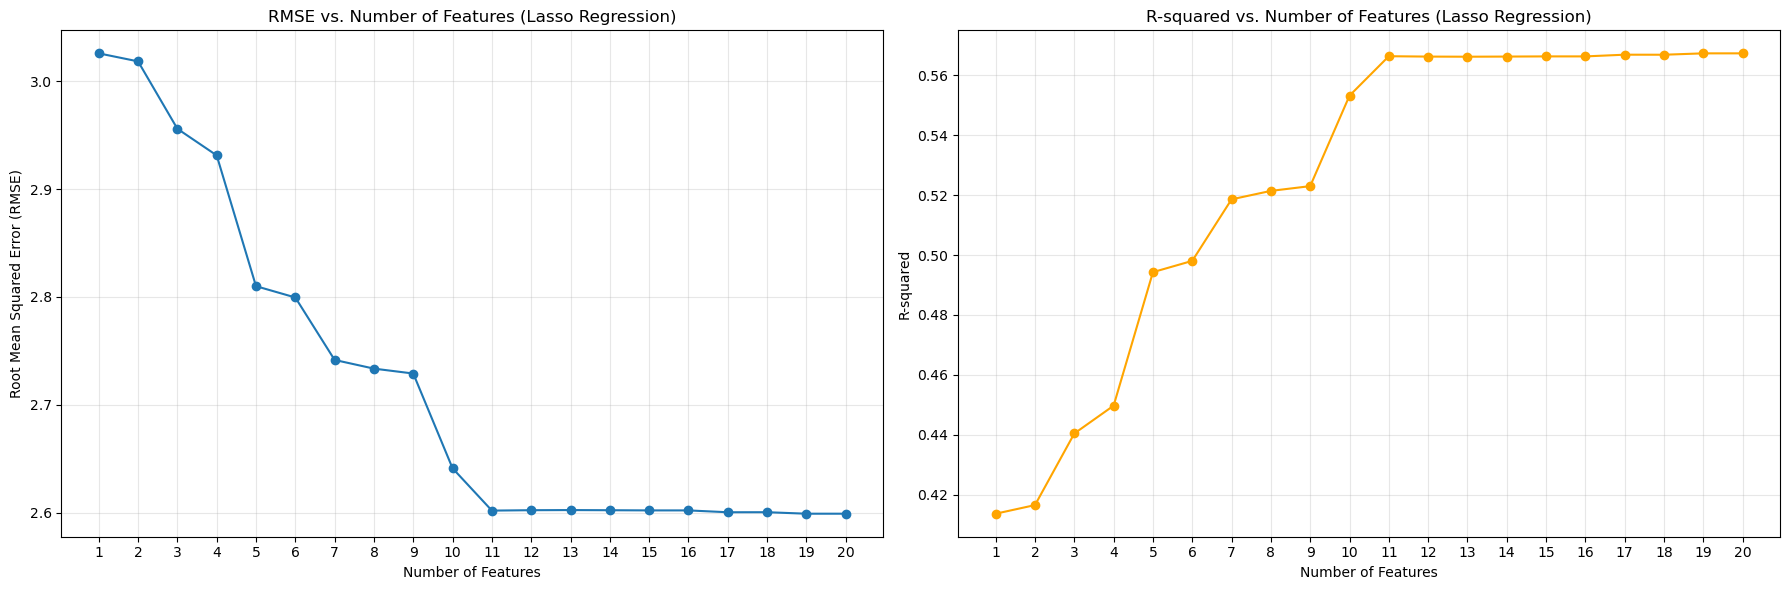

In [84]:
import numpy as np
from sklearn.metrics import r2_score


features_range = np.linspace(1, len(lasso.coef_), len(lasso.coef_), dtype=int)
performance_metrics = []

for num_features in features_range:
    # Select the top 'num_features' based on coefficient magnitude
    top_features_indices = np.argsort(np.abs(lasso.coef_))[-num_features:]
    X_train_selected = X_train_scaled[:, top_features_indices]
    X_test_selected = X_test_scaled[:, top_features_indices]

    # Train and evaluate the model using the selected features
    lasso_temp = LassoCV(cv=5, random_state=42)
    lasso_temp.fit(X_train_selected, y_train)
    y_pred_temp = lasso_temp.predict(X_test_selected)

    # Calculate performance metrics
    mse_temp = mean_squared_error(y_test, y_pred_temp)
    r2_temp = r2_score(y_test, y_pred_temp)
    performance_metrics.append((num_features, mse_temp, r2_temp))

# Convert to a DataFrame for visualization
performance_df = pd.DataFrame(performance_metrics, columns=["Num_Features", "MSE", "R2"])

# Separate plots for RMSE and R-squared
performance_df["RMSE"] = np.sqrt(performance_df["MSE"])

# Modify the x-axis to display integers
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharex=True)

# Plot RMSE vs. Number of Features
axes[0].plot(performance_df["Num_Features"], performance_df["RMSE"], marker='o')
axes[0].set_xlabel("Number of Features")
axes[0].set_ylabel("Root Mean Squared Error (RMSE)")
axes[0].set_title("RMSE vs. Number of Features (Lasso Regression)")
axes[0].grid(alpha=0.3)
axes[0].set_xticks(performance_df["Num_Features"])

# Plot R-squared vs. Number of Features
axes[1].plot(performance_df["Num_Features"], performance_df["R2"], marker='o', color='orange')
axes[1].set_xlabel("Number of Features")
axes[1].set_ylabel("R-squared")
axes[1].set_title("R-squared vs. Number of Features (Lasso Regression)")
axes[1].grid(alpha=0.3)
axes[1].set_xticks(performance_df["Num_Features"])

plt.tight_layout()
plt.show()

In [9]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Use only the first 3 principal components
pca_3 = PCA(n_components=3)
X_train_pca_3 = pca_3.fit_transform(X_train)
X_test_pca_3 = pca_3.transform(X_test)

# Train a Random Forest Regressor
rf = RandomForestRegressor(random_state=42, n_estimators=10)
rf.fit(X_train_pca_3, y_train)

# Predict and calculate metrics
y_pred_pca_3 = rf.predict(X_test_pca_3)
rmse_pca_3 = np.sqrt(mean_squared_error(y_test, y_pred_pca_3))
r2_pca_3 = r2_score(y_test, y_pred_pca_3)

rmse_pca_3, r2_pca_3

(2.8909378009650624, 0.46471228614106963)